In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import re
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(5)
import matplotlib.pyplot as plt
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [184]:
df=pd.read_csv('cs_data1.csv')
df.drop(columns="Unnamed: 0", inplace=True)

In [185]:
df

,제목,분류
0,회원등급별 할인혜택,회원
1,룸페커 회원혜택이 어떻게 되나요?,회원
2,첫구매 감사 6% 할인쿠폰이 궁금해요,회원
3,회원등급할인과 쿠폰할인이 합산되어 할인되지 않아요,회원
4,회원가입시 적은 회원정보가 기억나지 않아요,회원
...,...,...
299,회원가입하면 혜택이 있나요?,회원
300,비회원도 구매할 수 있나요?,회원
301,아이디와 패스워드를 잊어버렸어요!,회원
302,주소와 전화번호등 개인정보 변경은 어떻게 해요?,회원


In [186]:
#라벨인코딩
encoder=LabelEncoder()
df['분류'].unique()
encoder.fit(df['분류'].unique())
target=encoder.transform(df['분류'])

df['분류']= target
df['분류']


0      3
1      3
2      3
3      3
4      3
      ..
299    3
300    3
301    3
302    3
303    3
Name: 분류, Length: 304, dtype: int32

In [187]:
df 

,제목,분류
0,회원등급별 할인혜택,3
1,룸페커 회원혜택이 어떻게 되나요?,3
2,첫구매 감사 6% 할인쿠폰이 궁금해요,3
3,회원등급할인과 쿠폰할인이 합산되어 할인되지 않아요,3
4,회원가입시 적은 회원정보가 기억나지 않아요,3
...,...,...
299,회원가입하면 혜택이 있나요?,3
300,비회원도 구매할 수 있나요?,3
301,아이디와 패스워드를 잊어버렸어요!,3
302,주소와 전화번호등 개인정보 변경은 어떻게 해요?,3


In [188]:
encoder.classes_

array(['배송', '상품관련', '주문', '회원'], dtype=object)

In [189]:
test_labels = ['배송','주문'] 
print(test_labels, '->', encoder.transform(test_labels))


['배송', '주문'] -> [0 2]


0-> 배송
1-> 상품관련
2-> 주문 
3->회원

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
제목    304 non-null object
분류    304 non-null int32
dtypes: int32(1), object(1)
memory usage: 3.7+ KB


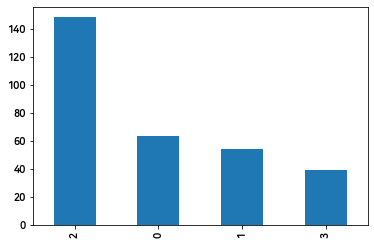

In [191]:
df['분류'].value_counts().plot(kind='bar')

In [192]:
import re#규칙을 가지고 필터링해주는

In [193]:
df['제목'] = df['제목'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', "", x))

#ㄱ-|가-힣 한글이 아닌것은 다 뺴라

In [194]:
df.head()

,제목,분류
0,회원등급별 할인혜택,3
1,룸페커 회원혜택이 어떻게 되나요,3
2,첫구매 감사 할인쿠폰이 궁금해요,3
3,회원등급할인과 쿠폰할인이 합산되어 할인되지 않아요,3
4,회원가입시 적은 회원정보가 기억나지 않아요,3


In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

okt = Okt()

In [196]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df = 3, max_df = 0.9)
tfidf

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2))

In [197]:
X_train, X_test, y_train, y_test = train_test_split(df['제목'], df['분류'], test_size=0.2, random_state=42)

In [198]:
X_train.head()
y_train.head()

269    2
211    2
197    2
75     1
177    1
Name: 분류, dtype: int32

In [199]:
X_test.head()

180    취소반품환불 무탠픽업 주문건을 취소환불교환 하고 싶어요
154                가입인증 본인인증은 어떻게 하나요
111        상품을 아직 못받았는데 수령을 눌렀어요괜찮을까요
247                  가상계좌 주문이 제한 되었어요
60        부분배송 안내 문자가 왔어요 어떤 상품이 오는거죠
Name: 제목, dtype: object

In [200]:
tfidf.fit(X_train)

TfidfVectorizer(max_df=0.9, min_df=3, ngram_range=(1, 2))

In [201]:
train_tfidf_df = tfidf.transform(X_train)
train_tfidf_df

<243x127 sparse matrix of type '<class 'numpy.float64'>'
	with 745 stored elements in Compressed Sparse Row format>

In [202]:
test_tfidf_df = tfidf.transform(X_test)
test_tfidf_df

<61x127 sparse matrix of type '<class 'numpy.float64'>'
	with 118 stored elements in Compressed Sparse Row format>

In [203]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

In [204]:
SA_lr.fit(train_tfidf_df, y_train)

LogisticRegression(random_state=0)

In [205]:
test_predict = SA_lr.predict(test_tfidf_df)

In [206]:
from sklearn.metrics import accuracy_score

print('감성 분석 정확도 : ', round(accuracy_score(y_test, test_predict), 3))

감성 분석 정확도 :  0.623


In [207]:
st = "언제와요"

In [208]:
st2 = re.sub(r'[^ ㄱ-ㅎ|가-힣]+', "", st)
st2

'언제와요'

In [209]:
st_tfidf_df = tfidf.transform([st2])
st_tfidf_df

<1x127 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [210]:
st2_predict = SA_lr.predict(st_tfidf_df)
st2_predict, st2_predict[0]

(array([2]), 2)

In [211]:
import pickle
import joblib

In [212]:
saved_model = pickle.dumps(SA_lr)

In [213]:
lr_from_pickle = pickle.loads(saved_model)

In [214]:
lr_from_pickle.predict(tfidf.transform(["언제오나요"]))

array([2])

In [215]:
joblib.dump(SA_lr, 'spam_ham_lr.pkl')

['spam_ham_lr.pkl']

In [216]:
def b (a):
    st2 = re.sub(r'[^ ㄱ-ㅎ|가-힣]+', "", a)
    st_tfidf_df = tfidf.transform([st2]) #벡터화
    st2_predict = SA_lr.predict(st_tfidf_df)
    if(st2_predict== 0):
        print(st2 , "->> 배송")
    elif(st2_predict== 1):
        print(st2 , "->> 상품관련")
    elif(st2_predict== 2):
        print(st2 , "->> 주문")
    else :
        print(st2 , "->> 회원")
# 0-> 배송 1-> 상품관련 2-> 주문 3->회원

In [217]:
st = input("문장입력:")
b(st)

문장입력:
 ->> 주문
